In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### **1. converting data to pandas dataframe**

In [70]:
file_dir="../data/"    #change this to your data directory

patients = file_dir + "patients.csv"
encounters = file_dir + "encounters.csv"
conditions = file_dir + "conditions.csv"
procedures = file_dir + "procedures.csv"

In [71]:
#load the data

patients_df = pd.read_csv(patients)
encounters_df = pd.read_csv(encounters)
conditions_df = pd.read_csv(conditions)
procedures_df = pd.read_csv(procedures)


### **2. Clean the DataFrames by removing unwanted columns (e.g expenses, locations )**


In [72]:
patients_df.drop(columns=['BIRTHPLACE',
                          'ADDRESS',
                          'CITY',
                          'STATE',
                          'COUNTY',
                          'FIPS',
                          'ZIP',
                          'LAT',
                          'LON',
                          'INCOME',
                          'HEALTHCARE_EXPENSES',
                          'HEALTHCARE_COVERAGE',
                          'SSN',
                          'DRIVERS',
                          'PASSPORT',
                          'SUFFIX',
                          'MAIDEN',
                          'MARITAL',
                          'ETHNICITY',
                          'PREFIX'], inplace=True)    # drop unnecessary columns for analysis

In [73]:
encounters_df.drop(columns=['BASE_ENCOUNTER_COST',
                            'TOTAL_CLAIM_COST', 
                            'PAYER_COVERAGE',
                            'ORGANIZATION', 
                            'PROVIDER', 
                            'PAYER'],
                   inplace=True)                        # drop unnecessary columns for analysis

In [74]:
procedures_df.drop(columns=['BASE_COST'], inplace=True) # drop base cost as it is not needed for analysis

In [100]:
procedures_df.drop_duplicates(subset=['ENCOUNTER', 'CODE'], inplace=True)

In [101]:
print(patients_df.shape)

(50186, 7)


In [102]:
encounters_df

,Id,START,STOP,PATIENT,ENCOUNTERCLASS,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,7d3c759d-bc25-ae60-fa5f-aa9468261553,2015-03-02T00:18:32Z,2015-03-02T00:33:32Z,3753e415-bb2c-5b73-9569-eefb29fa2e2d,wellness,162673000,General examination of patient (procedure),NaN,NaN
1,5a86340d-d955-81aa-60ac-096ee6c34d50,2014-09-20T04:11:00Z,2014-09-20T04:26:00Z,6b222eeb-8f40-f574-fcd0-aba7c9187958,wellness,410620009,Well child visit (procedure),NaN,NaN
2,587f6f59-f770-a0f6-5778-174e06d7d265,2017-04-07T12:57:58Z,2017-04-07T13:12:58Z,e071cf75-8fdf-5dcf-b69b-229dc9929237,wellness,162673000,General examination of patient (procedure),NaN,NaN
3,dc44fef6-b582-16d7-98aa-d2748ad32f11,2014-11-13T17:18:00Z,2014-11-13T17:33:00Z,3bca2e38-4cf3-6f67-aeb6-32c2b5b00ce7,wellness,410620009,Well child visit (procedure),NaN,NaN
4,2c7569c5-f9ef-1052-078b-8fd7c2bebfa7,2015-04-17T11:20:19Z,2015-04-17T11:35:19Z,90db2046-ac67-926b-2813-5b36e47065e2,wellness,410620009,Well child visit (procedure),NaN,NaN
...,...,...,...,...,...,...,...,...,...
468044,7b764298-a9e9-3293-ed5a-d06577270750,2021-03-13T19:08:36Z,2021-03-13T19:23:36Z,273a809e-3b85-28d3-4033-9e479afb3e51,wellness,162673000,General examination of patient (procedure),NaN,NaN
468045,565e69c5-81ab-e8e8-39c1-f09081835f50,2021-04-03T19:08:36Z,2021-04-03T19:23:36Z,273a809e-3b85-28d3-4033-9e479afb3e51,outpatient,33879002,Administration of vaccine to produce active im...,NaN,NaN
468046,22c3a7c0-197f-edc7-c6b0-d34753c1220a,2022-03-19T19:08:36Z,2022-03-19T19:23:36Z,273a809e-3b85-28d3-4033-9e479afb3e51,wellness,162673000,General examination of patient (procedure),NaN,NaN
468047,94f41589-6a35-2369-2b5a-68ef6e116c7d,2023-03-25T19:08:36Z,2023-03-25T19:23:36Z,273a809e-3b85-28d3-4033-9e479afb3e51,wellness,162673000,General examination of patient (procedure),NaN,NaN


### **3. Extract unique codes and their description of encounters, procedures and conditions**

In [75]:
encounter_codes = encounters_df[['CODE', 'DESCRIPTION']].drop_duplicates().sort_values(by='CODE') # drop duplicates and sort by code
print("Different encounter codes and descriptions:")
print(encounter_codes)

Different encounter codes and descriptions:
           CODE                                        DESCRIPTION
17     33879002  Administration of vaccine to produce active im...
6236   50849002               Emergency room admission (procedure)
0     162673000         General examination of patient (procedure)
6237  185347001                              Encounter for problem
7855  185349003                 Encounter for check up (procedure)
6373  308646001                                Death Certification
1     410620009                       Well child visit (procedure)


In [76]:
encounter_classes = encounters_df['ENCOUNTERCLASS'].drop_duplicates().sort_values() # drop duplicates and sort encounter classes
print("Different encounter classes:")
print(encounter_classes)

Different encounter classes:
6239    ambulatory
6236     emergency
6241     inpatient
17      outpatient
0         wellness
Name: ENCOUNTERCLASS, dtype: object


In [77]:
procedure_codes = procedures_df[['CODE', 'DESCRIPTION']].drop_duplicates().sort_values(by='CODE') # drop duplicates and sort by code
print("Different procedure codes and descriptions:")
print(procedure_codes)

Different procedure codes and descriptions:
                   CODE                                        DESCRIPTION
3              14768001              Peripheral blood smear interpretation
2              91602002                          Thoracentesis (procedure)
6             162676008              Brief general examination (procedure)
7216          167995008                      Sputum microscopy (procedure)
2253          173160006     Diagnostic fiberoptic bronchoscopy (procedure)
4093          180207008  Intravenous blood transfusion of packed cells ...
8             398171003                    Hearing examination (procedure)
0             399208008                      Plain chest X-ray (procedure)
4             415300000                      Review of systems (procedure)
1             418891003           Computed tomography of chest and abdomen
5             430193006              Medication Reconciliation (procedure)
387           432231006  Fine needle aspiration biopsy o

In [78]:
conditions_codes = conditions_df[['CODE', 'DESCRIPTION']].drop_duplicates().sort_values(by='CODE') # drop duplicates and sort by code
print("Different condition codes and descriptions:")
print(conditions_codes)

Different condition codes and descriptions:
              CODE                                        DESCRIPTION
0        162573006                  Suspected lung cancer (situation)
34       254632001            Small cell carcinoma of lung (disorder)
1        254637007              Non-small cell lung cancer (disorder)
2        271737000                                  Anemia (disorder)
3        424132000  Non-small cell carcinoma of lung  TNM stage 1 ...
35  67811000119102  Primary small cell malignant neoplasm of lung ...


### **4. Filter out set of Patients having data in all the required datadrames** 
(in our case, procedures,ecnounters and conditions)

- Set of Ids of patient

In [79]:
relevant_ids = set(encounters_df['PATIENT']) & set(procedures_df['PATIENT']) & set(conditions_df['PATIENT']) # intersection of patients in encounters, procedures, and conditions
print(f"Number of patients with encounters, procedures, and conditions: {len(relevant_ids)}")

Number of patients with encounters, procedures, and conditions: 218


- Map Patients with their number of Encounters

In [80]:
num_patients_encounters = encounters_df[encounters_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size() # count of encounters per patient

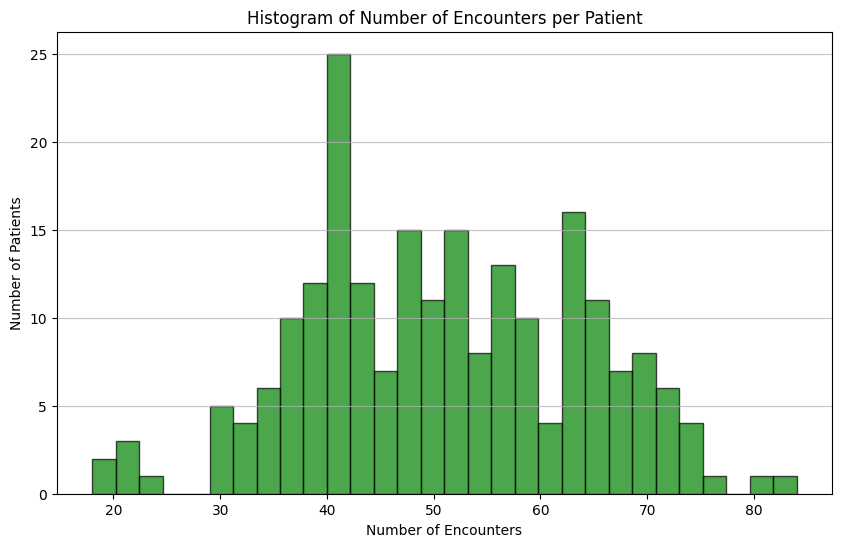

In [81]:
#creaate histogram of number of encounters per patient
plt.figure(figsize=(10, 6))
plt.hist(num_patients_encounters, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Number of Encounters per Patient')
plt.xlabel('Number of Encounters')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [82]:
print(num_patients_encounters)


PATIENT
00f7a855-2e4e-5a44-66f6-cf736160ed23    33
02731516-9023-b114-47cf-0030d92aa5c7    39
030f86e1-b4eb-f119-0ee6-faa3fa21bf84    56
03141e75-7492-df32-9716-dd60b1ad0ba6    54
03613eb0-4493-45e2-47b9-67b05c5664d4    37
                                        ..
fafe02d2-ba09-b537-9c8a-7dfbcbd128ec    40
fccb8555-6b46-da94-bd79-695341cbfa26    40
fcf1a409-ea9b-0ff7-bf25-c263d8a18166    40
fd80de8b-0acc-be4b-9647-503f33135b4d    41
ff96e301-0da5-86c4-2998-8a929fc057bb    80
Length: 218, dtype: int64


- Select small subset of Patients for analysis having encounter in a range ( in our case we choose 5 patients with range [50-70])

In [83]:
max_encounter = 70  # maximum number of encounters for a patient
min_encounter = 50  # minimum number of encounters for a patient
number_of_samples = 5  # number of patients to sample

selected_patients = num_patients_encounters[(num_patients_encounters < max_encounter) & (num_patients_encounters > min_encounter)].sample(n=number_of_samples, random_state=43).index
selected_patients = selected_patients.tolist()  # convert to list for easier handling
print(selected_patients) # selected patients ids

['8c8da0c6-b875-3596-cd3f-9d3e5f9eb559', 'a8eff6ce-71d9-51dd-28c6-6c948c25568a', '05ee2c7d-150d-15d2-8cb2-ef0e5ecfa960', 'df66d5ca-7ebe-86f9-c3d0-8550944a98ad', 'e84ff247-0627-d0d4-0d44-2e774208a6a2']


- Extract the data and create a new dataframe of selected patient from their resepective existing dataframe

In [84]:
selected_patients_encounter_df = encounters_df[encounters_df['PATIENT'].isin(selected_patients)] # filter encounters dataframe for selected patients
selected_patients_conditions_df = conditions_df[conditions_df['PATIENT'].isin(selected_patients)] # filter conditions dataframe for selected patients
selected_patients_procedures_df = procedures_df[procedures_df['PATIENT'].isin(selected_patients)] # filter procedures dataframe for selected patients

### **5. Tackle 'nan' values**

- Get the count of 'nan' values for each dataframe

In [85]:
#count the number of rows having nan in each column of selected_patients_conditions_df
nan_counts_for_condition = selected_patients_conditions_df.isna().sum()
print("Number of NaN values in each column of selected_patients_conditions_df:")
print(nan_counts_for_condition)

Number of NaN values in each column of selected_patients_conditions_df:
START           0
STOP           20
PATIENT         0
ENCOUNTER       0
CODE            0
DESCRIPTION     0
dtype: int64


- Since the stop time for condition diagnosed is not needed for our analysis, we only need when it was diagnosed. we remove the stop column.

In [86]:
selected_patients_encounter_df.drop(columns=['STOP'], inplace=True)
selected_patients_conditions_df.drop(columns=['STOP'], inplace=True)

/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/3447646326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_patients_encounter_df.drop(columns=['STOP'], inplace=True)
/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/3447646326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_patients_conditions_df.drop(columns=['STOP'], inplace=True)


In [87]:
#count the number of rows having nan in each column of selected_patients_procedures_df
nan_counts_for_procedure = selected_patients_procedures_df.isna().sum()
print("Number of NaN values in each column of selected_patients_procedures_df:")
print(nan_counts_for_procedure)

Number of NaN values in each column of selected_patients_procedures_df:
START                   0
STOP                    0
PATIENT                 0
ENCOUNTER               0
CODE                    0
DESCRIPTION             0
REASONCODE           1680
REASONDESCRIPTION    1680
dtype: int64


In [88]:
#count the number of rows having nan in each column of selected_patients_encounter_df
nan_counts_for_encounter = selected_patients_encounter_df.isna().sum()
print("Number of NaN values in each column of selected_patients_encounter_df:")
print(nan_counts_for_encounter)

Number of NaN values in each column of selected_patients_encounter_df:
Id                    0
START                 0
PATIENT               0
ENCOUNTERCLASS        0
CODE                  0
DESCRIPTION           0
REASONCODE           41
REASONDESCRIPTION    41
dtype: int64


- For Procedure and Encounter dataframe we found out ***REASONCODE*** and ***REASONDESCRIPTION*** columns have 'nan' values.<br><br> we allot **REASONCODE = -1 and REASONDESCRIPTION = REASON_NOT_DOCUMENTED**

In [89]:
selected_patients_procedures_df['REASONCODE'].fillna(-1, inplace=True)
selected_patients_procedures_df['REASONDESCRIPTION'].fillna('REASON_NOT_DOCUMENTED', inplace=True)

/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/3863793726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_patients_procedures_df['REASONCODE'].fillna(-1, inplace=True)
/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/3863793726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_patients_

In [90]:
selected_patients_encounter_df['REASONCODE'].fillna(-1, inplace=True)
selected_patients_encounter_df['REASONDESCRIPTION'].fillna('REASON_NOT_DOCUMENTED', inplace=True)

/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/1904928059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_patients_encounter_df['REASONCODE'].fillna(-1, inplace=True)
/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/1904928059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_patients_e

- There are same procedures multiple times for a single encounter. Remove them.

In [91]:
#remove the duplicates from selected_patients_procedures_df where encounter and code are the same
selected_patients_procedures_df.drop_duplicates(subset=['ENCOUNTER', 'CODE'], inplace=True)

/var/folders/l7/g8pnvl0d1tx0tb1blkmqwmj00000gn/T/ipykernel_74208/2973867754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_patients_procedures_df.drop_duplicates(subset=['ENCOUNTER', 'CODE'], inplace=True)


### **6. Get the dataframe Metrices**

- Average Numbers of ecnounters, procedures, conditions.

In [92]:
#average number of encounter per patient in relevant_ids
avg_encounters = encounters_df[encounters_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().mean()
print(f"Average number of encounters per patient in relevant_ids: {avg_encounters:.2f}")

Average number of encounters per patient in relevant_ids: 50.73


In [93]:
avg_conditions = conditions_df[conditions_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().mean()
print(f"Average number of conditions per patient in relevant_ids: {avg_conditions:.2f}")

Average number of conditions per patient in relevant_ids: 3.76


In [94]:
avg_procedures = procedures_df[procedures_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().mean()
print(f"Average number of procedures per patient in relevant_ids: {avg_procedures:.2f}")

Average number of procedures per patient in relevant_ids: 483.55


- Max and Min number of encounter,conditions and procedures

In [95]:
#min and max number of encounters per patient in relevant_ids
min_encounters = encounters_df[encounters_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().min()
max_encounters = encounters_df[encounters_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().max()
print(f"Minimum number of encounters per patient in relevant_ids: {min_encounters}")
print(f"Maximum number of encounters per patient in relevant_ids: {max_encounters}")

#min and max number of conditions per patient in relevant_ids
min_conditions = conditions_df[conditions_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().min()
max_conditions = conditions_df[conditions_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().max()
print(f"Minimum number of conditions per patient in relevant_ids: {min_conditions}")
print(f"Maximum number of conditions per patient in relevant_ids: {max_conditions}")    

#min and max number of procedures per patient in relevant_ids
min_procedures = procedures_df[procedures_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().min()
max_procedures = procedures_df[procedures_df['PATIENT'].isin(relevant_ids)].groupby('PATIENT').size().max()
print(f"Minimum number of procedures per patient in relevant_ids: {min_procedures}")
print(f"Maximum number of procedures per patient in relevant_ids: {max_procedures}")

Minimum number of encounters per patient in relevant_ids: 18
Maximum number of encounters per patient in relevant_ids: 84
Minimum number of conditions per patient in relevant_ids: 3
Maximum number of conditions per patient in relevant_ids: 4
Minimum number of procedures per patient in relevant_ids: 36
Maximum number of procedures per patient in relevant_ids: 908


## **7. Save the dataframes in CSV format**

In [96]:
output_data_dir = "filtered_data"  # directory to save cleaned data
if not os.path.exists(output_data_dir):
    os.makedirs("../filtered_data", exist_ok=True)  # create output directory if it doesn't exist
    
selected_patients_encounter_df.to_csv(f"../{output_data_dir}/selected_patients_encounter.csv", index=False)
selected_patients_conditions_df.to_csv(f"../{output_data_dir}/selected_patients_conditions.csv", index=False)
selected_patients_procedures_df.to_csv(f"../{output_data_dir}/selected_patients_procedures.csv", index=False)

#want separate df for selected_patients_df from patients_df
selected_patients_df = patients_df[patients_df['Id'].isin(selected_patients)]
selected_patients_df.to_csv(f"../{output_data_dir}/selected_patients.csv", index=False)

- Get the First Encounters by Patients in separate csv file (helpful to mark patients first encounter)

In [97]:
# get the first encounter for each patient in selected_patients_df
first_encounters = selected_patients_encounter_df.groupby('PATIENT').first().reset_index()
first_encounters.to_csv(f"../{output_data_dir}/first_encounters.csv", index=False)

- Get the First Encounter of Patients.

In [98]:
import pandas as pd

patients = pd.read_csv(f"../{output_data_dir}/selected_patients.csv")
encounters = pd.read_csv(f"../{output_data_dir}/selected_patients_encounter.csv")

# Ensure datetime format
encounters['START'] = pd.to_datetime(encounters['START'])

# Get the first encounter per patient by earliest 'START' time
first_encounters = (
    encounters.sort_values(by='START')
              .groupby('PATIENT', as_index=False)
              .first()
)

first_encounters = first_encounters[['PATIENT', 'Id']] 
first_encounters.columns = ['PATIENT', 'ENCOUNTER_ID']

first_encounters.to_csv(f"../{output_data_dir}/first_encounter_per_patient.csv", index=False)


- Get Chained Encounter CSV for every patients. i.e one encounter followed by another (helpful for creating encounter chains)

In [99]:
import pandas as pd

df_encounters = pd.read_csv(f"../{output_data_dir}/selected_patients_encounter.csv")

df_encounters['START'] = pd.to_datetime(df_encounters['START'], errors='coerce')

df_encounters = df_encounters.dropna(subset=['START'])

grouped = df_encounters.sort_values(by='START').groupby('PATIENT')

chained_encounters_fixed = []
for patient_id, group in grouped:
    sorted_group = group.sort_values(by='START')
    ids = sorted_group['Id'].tolist()
    for i in range(len(ids) - 1):
        chained_encounters_fixed.append((patient_id, ids[i], ids[i+1]))

df_chained_fixed = pd.DataFrame(chained_encounters_fixed, columns=["PATIENT", "ENCOUNTER_ID_1", "ENCOUNTER_ID_2"])

df_chained_fixed.to_csv(f"../{output_data_dir}/chained_encounters_patient_specific.csv", index=False)
